## Examen Módulo Machine Learning
### Primer Intento: House Prices Dataset
* Alumno: Bernardo Arturo Sosa Bagnoli
* Fecha: 16/11/2024 10:05am

### Instrucciones para examen
Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de regresión en un dataset de precios de casas. Utilizaremos el «House Prices Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.
### Contexto y Descripción del Dataset
El «House Prices Dataset» contiene datos sobre diversas características de casas residenciales en Ames, Iowa. La tarea es * predecir el precio final de cada casa (variable objetivo) en función de sus características *.

In [ ]:

# Importar Librerias a utilizar 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('../data/examen_2/train.csv')
print('(CantRow, CantColumn)')
print(df.shape)
print(df.columns)

df_clean = df.drop('Id', axis=1)
print(df_clean.shape)
print(df_clean.columns)


(CantRow, CantColumn)
(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',

### Limpieza de Datos
Se incluyen la eliminación de datos duplicados, manejo de nulos, verificación de tipos de datos por columnas, Unificación de datos (manejo de strings) y Manejo de datos faltantes

In [ ]:
# Identificar duplicados
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")
duplicados_clean = df_clean.duplicated().sum()
print(f"Registros duplicados sin Id: {duplicados_clean}")
# Eliminar duplicados
# df = df.drop_duplicates()
# df_clean = df_clean.drop_duplicates()

# Identificar valores nulos
# pd.set_option('display.max_rows', None) # => Para imprimir todas las filas / pd.reset_option('display.max_rows') # => Para no imprimir todas las filas
print('(CantRow, CantColumn)')
print(df.shape)
nulos = df.isnull().sum()
print(f"Valores Nulos por columna:\n{nulos}")

# Filtrado de columnas por tipo de dato
df_float = df_clean.select_dtypes(include=[np.float64])
df_int = df_clean.select_dtypes(include=[np.int64])
df_object = df_clean.select_dtypes(exclude=[np.float64, np.int64])
print(f'Filtrado de columnas por tipo de datos:\n - Float: {df_float.columns}\n - Int: {df_int.columns}\n - Object: {df_object.columns}')

# Tratamiento de datos nulos por tipo de datos
# Asegurarse de que 'Desconocido' está en las categorías antes de rellenar
for col in df_object.columns:
    if pd.api.types.is_categorical_dtype(df_clean[col]):
        df_clean[col] = df_clean[col].cat.add_categories(['Desconocido'])

df_clean[df_object.columns] = df_clean[df_object.columns].fillna('Desconocido') # Remplaza todos los nulos de la columna de tipo Object
df_clean['LotFrontage'] = df_clean['LotFrontage'].fillna(df_clean['LotFrontage'].median()) # Remplaza los nulos por la mediana de las columnas float
df_clean['MasVnrArea'] = df_clean['MasVnrArea'].fillna(df_clean['MasVnrArea'].median()) # Remplaza los nulos por la mediana de las columnas float
df_clean['GarageYrBlt'] = df_clean['GarageYrBlt'].fillna(df_clean['GarageYrBlt'].median()) # Remplaza los nulos por la mediana de las columnas float

# Normalización de valores en las columnas object
df_clean[df_object.columns] = df_clean[df_object.columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Cambio en el tipo de datos de las columnas
df_clean[df_float.columns] = df_clean[df_float.columns].apply(pd.to_numeric, errors='coerce')
df_clean[df_int.columns] = df_clean[df_int.columns].apply(pd.to_numeric, errors='coerce')
df_clean[df_object.columns] = df_clean[df_object.columns].astype('category')

# Verificar nulos después de la conversión
nuevos_nulos = df_clean.isnull().sum()
print(f"Nuevos nulos tras la conversión:\n{nuevos_nulos}")

# Verificacion de los cambios
print(df_clean.info())

# Guardar dataframe
# df_clean.to_csv('../data/examen_2/train_clean.csv', index=False)


Registros duplicados: 0
Registros duplicados sin Id: 0
(CantRow, CantColumn)
(1460, 81)
Valores Nulos por columna:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Filtrado de columnas por tipo de datos:
 - Float: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
 - Int: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'

C:\Users\asosa\AppData\Local\Temp\ipykernel_3844\2108315221.py:26: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_clean[col]):
C:\Users\asosa\AppData\Local\Temp\ipykernel_3844\2108315221.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean[df_object.columns] = df_clean[df_object.columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)


### Exploración de datos Univariadas y Multivariadas


C:\Users\asosa\AppData\Local\Temp\ipykernel_3844\187124392.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Neighborhood', palette='Set3')
C:\Users\asosa\AppData\Local\Temp\ipykernel_3844\187124392.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='BedroomAbvGr', y='SalePrice', palette='pastel')


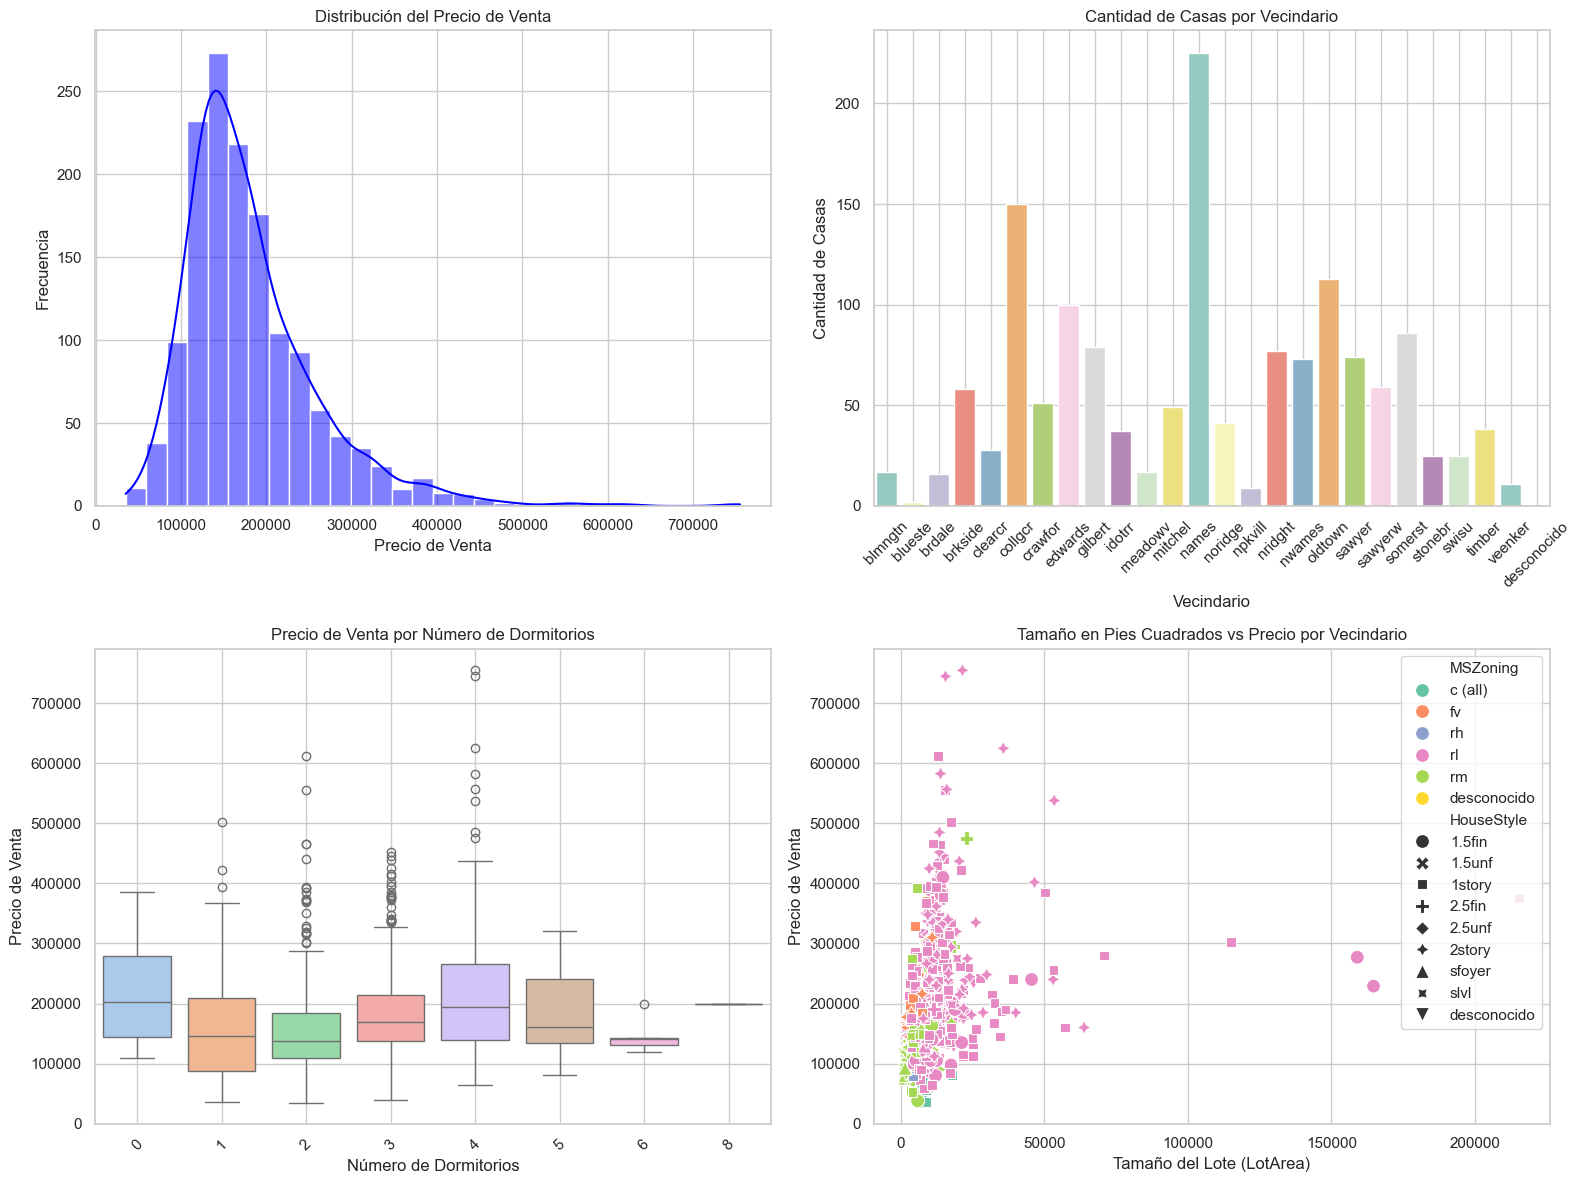

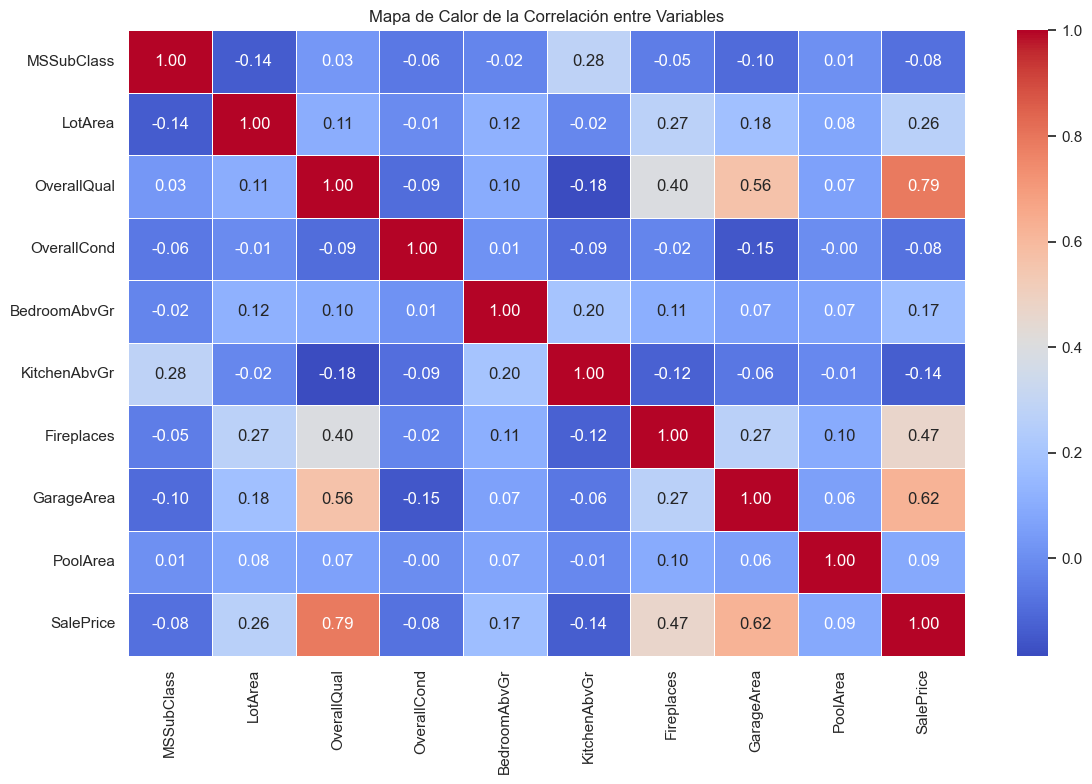

Estadísticas Descriptivas para Variables Numéricas:
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     

In [4]:
sns.set(style='whitegrid')

# Crear la figura y la cuadrícula de subgráficos
plt.figure(figsize=(16, 12))

# Histograma del precio de venta (SalePrice)
plt.subplot(2, 2, 1)
sns.histplot(df_clean['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.grid(True)

# Diagrama de barras de la cantidad de casas por vecindario
plt.subplot(2, 2, 2)
sns.countplot(data=df_clean, x='Neighborhood', palette='Set3')
plt.title('Cantidad de Casas por Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Cantidad de Casas')
plt.xticks(rotation=45)
plt.grid(True)

# Boxplot del Precio por Número de Dormitorios
plt.subplot(2, 2, 3)
sns.boxplot(data=df_clean, x='BedroomAbvGr', y='SalePrice', palette='pastel')
plt.title('Precio de Venta por Número de Dormitorios')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio de Venta')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico de dispersión de tamaño en pies cuadrados por precio
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_clean, x='LotArea', y='SalePrice', hue='MSZoning', style='HouseStyle', s=100, palette='Set2')
plt.title('Tamaño en Pies Cuadrados vs Precio por Vecindario')
plt.xlabel('Tamaño del Lote (LotArea)')
plt.ylabel('Precio de Venta')
plt.grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

# Mapa de calor de la correlación entre variables numéricas
plt.figure(figsize=(12, 8))
df_clean_tmp = df_clean[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'PoolArea', 'SalePrice']]
corr_matrix = df_clean_tmp.corr()  # Calcula la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
desc_stats = df_clean.describe()
print("Estadísticas Descriptivas para Variables Numéricas:")
print(desc_stats)

# Medias, medianas y modas
media_saleprice = df_clean['SalePrice'].mean()
mediana_saleprice = df_clean['SalePrice'].median()
moda_saleprice = df_clean['SalePrice'].mode()[0]

print("\nMedia del Precio de Venta:", media_saleprice)
print("Mediana del Precio de Venta:", mediana_saleprice)
print("Moda del Precio de Venta:", moda_saleprice)

# Desviación estándar
desviacion_saleprice = df_clean['SalePrice'].std()
print("\nDesviación estándar del Precio de Venta:", desviacion_saleprice)

### Implementación de Modelos:
 * Modelos de Regresión: Implementa modelos de Linear Regression y LightGBM (LGBM).
 * Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.
 * Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [24]:
# Codificación de variables categóricas
df_clean_encoded = pd.get_dummies(df_clean_tmp, drop_first=True)

# Separar las características (X) y la variable objetivo (y)
X = df_clean_encoded.drop('SalePrice', axis=1)  # Asegúrate de que 'SalePrice' es tu variable objetivo
y = df_clean_encoded['SalePrice']

# Division del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# para tener en cuenta
# El MSE mide la magnitud de los errores. Cuanto mayor es el MSE, peor es el modelo en términos de error.
# El RMSE es simplemente la raíz cuadrada del MSE y proporciona una medida del error en las unidades originales de la variable dependiente. Un RMSE más bajo indica un mejor desempeño.
#  R2, también conocido como el coeficiente de determinación, mide la proporción de la varianza de la variable dependiente que es explicada por el modelo.


In [25]:
# Regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)

# Evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regresión Lineal - MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

Regresión Lineal - MSE: 2166258761.79, RMSE: 46543.09, R²: 0.72


In [26]:
# LightGBM
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Predicciones
y_pred_lgb = lgb_model.predict(X_test)

# Evaluación
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - MSE: {mse_lgb:.2f}, RMSE: {rmse_lgb:.2f}, R²: {r2_lgb:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 8
[LightGBM] [Info] Start training from score 181441.541952
LightGBM - MSE: 1482762327.58, RMSE: 38506.65, R²: 0.81


In [27]:
# Comparación de modelos
print("\nComparación de Modelos:")
print(f"Regresión Lineal - MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"LightGBM - MSE: {mse_lgb:.2f}, RMSE: {rmse_lgb:.2f}, R²: {r2_lgb:.2f}")

# Elegir el mejor modelo según R²
if r2_lr > r2_lgb:
    print("\nLa regresión lineal es el mejor modelo.")
else:
    print("\nLightGBM es el mejor modelo.")


Comparación de Modelos:
Regresión Lineal - MSE: 2166258761.79, RMSE: 46543.09, R²: 0.72
LightGBM - MSE: 1482762327.58, RMSE: 38506.65, R²: 0.81

LightGBM es el mejor modelo.


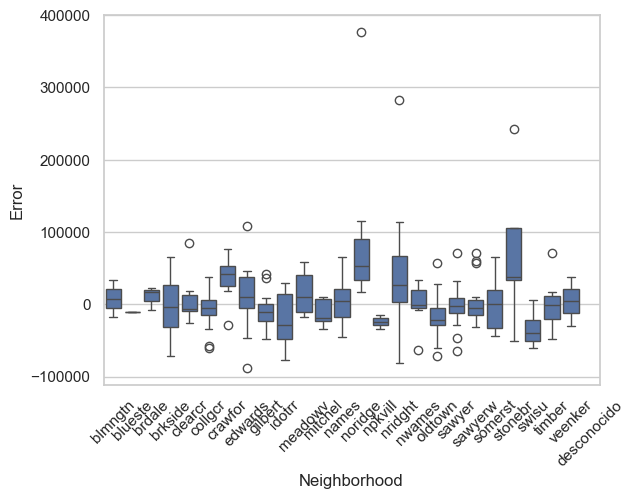

In [30]:
# Análisis de error para diferentes grupos (Ejemplo: Vecindarios)
error_lr = y_test - y_pred_lr
df_error = pd.DataFrame({'Error': error_lr, 'Neighborhood': df_clean.loc[X_test.index, 'Neighborhood']})

# Ver si el error es más grande en ciertos grupos
sns.boxplot(x='Neighborhood', y='Error', data=df_error)
plt.xticks(rotation=45)
plt.show()